In [114]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [3]:
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0):
        return df[row:row + 5]
    interact(peek, row=(0, len(df), 5))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [19]:
import requests

# Replicating PurpleAir Correction

## Cleaned Data (from paper)

In [ ]:
date = "2018-11-13"

In [41]:
from pathlib import Path

data = Path('Data_DevelopmentUSPAcorrection_210408')

def ls(path):
    return [p.name for p in path.iterdir()]

ls(data)

['withheldfinaldataset_Fig7.csv',
 'datadictionary_UScorrection_210408_rev3.docx',
 'Full24hrdataset.csv',
 'Fig4.csv',
 'FigS1_IA.csv',
 'Fig1.csv']

In [42]:
df = pd.read_csv(data / 'Full24hrdataset.csv', index_col=0)
df

,Date,ID,region,FEMorFRM,...,ratiocfatm_FM,diffcfatm_FM,ratiocf1_FM,diffcf1_FM
1,2019-05-17,AK1,Alaska,FRM,...,1.23,1.56,1.29,1.92
2,2019-05-18,AK1,Alaska,FRM,...,0.88,-0.44,0.92,-0.31
3,2019-05-21,AK1,Alaska,FRM,...,0.95,-0.20,0.95,-0.20
...,...,...,...,...,...,...,...,...,...
12428,2019-02-20,WI6,North,FRM,...,1.60,9.41,1.62,9.70
12429,2019-03-04,WI6,North,FRM,...,0.59,-5.79,0.59,-5.79
12430,2019-03-22,WI6,North,FRM,...,1.63,3.64,1.63,3.64


In [43]:
display_df(df, rows=5, cols=31)

,Date,ID,region,FEMorFRM,FEMorFRMtype,PM25FM,PM25cfatm,PM25cf1,b0.3um,b0.5um,b1um,b2.5um,b5um,b10um,b0.3to0.5,b0.5to1,b1to2.5,b2.5to5,b5to10,TempC,RH,Dewpoint,PM25PAlinearcor,PM25PARHcor,ratioPARHcor_FM,diffPARHcor_FM,ratiocfatm_FM,diffcfatm_FM,ratiocf1_FM,diffcf1_FM
1,2019-05-17,AK1,Alaska,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,6.7,8.26,8.62,1154.62,331.85,52.04,4.66,1.80,0.82,822.77,279.81,47.38,2.86,0.98,18.03,38.56,3.63,6.03,6.95,1.04,0.25,1.23,1.56,1.29,1.92
2,2019-05-18,AK1,Alaska,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,3.8,3.36,3.49,603.13,172.43,21.93,1.70,0.72,0.49,430.70,150.50,20.23,0.98,0.23,16.12,49.40,5.44,3.35,3.33,0.88,-0.47,0.88,-0.44,0.92,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,2019-03-04,WI6,North,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,14.0,8.21,8.21,834.75,227.65,36.56,5.33,1.65,0.69,607.10,191.09,31.23,3.68,0.96,-14.38,48.21,-23.02,5.82,5.90,0.42,-8.10,0.59,-5.79,0.59,-5.79
12430,2019-03-22,WI6,North,FRM,R & P Model 2025 PM-2.5 Sequential Air Sampler...,5.8,9.44,9.44,1000.84,283.66,50.24,5.62,1.35,0.55,717.18,233.42,44.63,4.26,0.81,5.08,52.20,-4.02,6.46,6.20,1.07,0.40,1.63,3.64,1.63,3.64


In [44]:
cols = [
    'Date',
    'ID',
    'region', 
    'PM25FM',
    # 'PM25cfatm',
    'PM25cf1',
    'TempC',
    'RH',
    'Dewpoint',
]

In [46]:
ca = (df.query('ID == "CA1"')[cols])
ca

,Date,ID,region,PM25FM,PM25cf1,TempC,RH,Dewpoint
1658,2019-03-10,CA1,West,1.0,0.74,14.35,50.88,4.23
1659,2019-03-13,CA1,West,1.0,0.50,13.51,35.96,-1.39
1660,2019-03-22,CA1,West,6.4,6.77,14.26,63.87,7.46
...,...,...,...,...,...,...,...,...
1816,2018-09-11,CA1,West,10.5,10.16,26.64,34.92,9.88
1817,2018-09-14,CA1,West,6.3,5.97,24.06,39.34,9.35
1818,2018-09-08,CA1,West,8.6,12.05,28.75,32.03,10.46


## Raw PurpleAir

In [15]:
pa_api = 'https://api.purpleair.com/v1'
# group_id = '773'

pa_key = '6302F2D4-2859-11EC-BAD6-42010A800017'
headers = {'X-API-Key': pa_key}

# https://aqs.epa.gov/aqsweb/documents/data_api.html#daily
r = requests.get(f'{pa_api}/keys', {}, headers=headers)
res = r.json()
res


{'api_version': 'V1.0.10-0.0.12',
 'time_stamp': 1633987912,
 'api_key_type': 'READ'}

In [57]:
data = Path('purpleair')
csvs = sorted(ls(data))
csvs

['.DS_Store',
 'AMTS_TESTING (outside) (38.568404 -121.493163) Primary Real Time 05_20_2018 12_29_2019.csv',
 'AMTS_TESTING (outside) (38.568404 -121.493163) Secondary Real Time 05_20_2018 12_29_2019.csv',
 'AMTS_TESTING B (undefined) (38.568404 -121.493163) Primary Real Time 05_20_2018 12_29_2019.csv',
 'AMTS_TESTING B (undefined) (38.568404 -121.493163) Secondary Real Time 05_20_2018 12_29_2019.csv']

In [58]:
df = pd.read_csv(data / csvs[1])
df

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,...,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2018-05-20 00:00:35 UTC,20733,0.98,1.23,...,83.0,32.0,1.23,NaN
1,2018-05-20 00:01:55 UTC,20734,0.96,1.94,...,83.0,32.0,1.94,NaN
2,2018-05-20 00:03:15 UTC,20735,1.07,1.80,...,83.0,32.0,1.80,NaN
...,...,...,...,...,...,...,...,...,...
672752,2019-12-29 23:55:30 UTC,523358,24.44,40.45,...,52.0,67.0,36.91,NaN
672753,2019-12-29 23:57:30 UTC,523359,23.69,37.72,...,58.0,67.0,35.49,NaN
672754,2019-12-29 23:59:30 UTC,523360,24.60,37.57,...,58.0,66.0,35.33,NaN


In [59]:
display_df(df, cols=11)

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
0,2018-05-20 00:00:35 UTC,20733,0.98,1.23,1.23,2299.0,-62.0,83.0,32.0,1.23,NaN
1,2018-05-20 00:01:55 UTC,20734,0.96,1.94,1.94,2300.0,-63.0,83.0,32.0,1.94,NaN
2,2018-05-20 00:03:15 UTC,20735,1.07,1.80,2.14,2301.0,-64.0,83.0,32.0,1.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...
672752,2019-12-29 23:55:30 UTC,523358,24.44,40.45,45.52,8954.0,-43.0,52.0,67.0,36.91,NaN
672753,2019-12-29 23:57:30 UTC,523359,23.69,37.72,40.99,8956.0,-46.0,58.0,67.0,35.49,NaN
672754,2019-12-29 23:59:30 UTC,523360,24.60,37.57,42.47,8958.0,-43.0,58.0,66.0,35.33,NaN


In [69]:
(df
 [df['created_at'].str.startswith(date)]
 [['PM2.5_CF1_ug/m3']]
 .mean()
 )

PM2.5_CF1_ug/m3    270.78
dtype: float64

In [65]:
ca.query('Date == @date')

,Date,ID,region,PM25FM,PM25cf1,TempC,RH,Dewpoint
1743,2018-11-13,CA1,West,108.8,256.31,14.38,38.62,0.38


In [ ]:
df

In [81]:
pa = (df.assign(
        created_at=pd.to_datetime(df['created_at'], infer_datetime_format=True))
      .set_index('created_at'))
pa

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,...,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
created_at,,,,,,,,,
2018-05-20 00:00:35+00:00,20733,0.98,1.23,1.23,...,83.0,32.0,1.23,NaN
2018-05-20 00:01:55+00:00,20734,0.96,1.94,1.94,...,83.0,32.0,1.94,NaN
2018-05-20 00:03:15+00:00,20735,1.07,1.80,2.14,...,83.0,32.0,1.80,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-29 23:55:30+00:00,523358,24.44,40.45,45.52,...,52.0,67.0,36.91,NaN
2019-12-29 23:57:30+00:00,523359,23.69,37.72,40.99,...,58.0,67.0,35.49,NaN
2019-12-29 23:59:30+00:00,523360,24.60,37.57,42.47,...,58.0,66.0,35.33,NaN


## AQS data

In [21]:
email = 'samlau95@gmail.com'
key = 'mauvemallard58'

# https://www.epa.gov/aqs/aqs-memos-technical-note-reporting-pm25-continuous-monitoring-and-speciation-data-air-quality
param = '88101' # for PM2.5 local conditions

start_date = '20180520'
end_date = '20181231'
# end_date = '20191229'

site_id = '06-067-0010'
[state, county, site] = site_id.split('-')

In [22]:
api = 'https://aqs.epa.gov/data/api'

# https://aqs.epa.gov/aqsweb/documents/data_api.html#daily
r = requests.get(
    f'{api}/dailyData/bySite', {
        'email': email,
        'key': key,
        'param': param,
        'bdate': start_date,
        'edate': end_date,
        'state': state,
        'county': county,
        'site': site,
    })
res = r.json()
res

{'Header': [{'status': 'Success',
   'request_time': '2021-10-11T21:15:37-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/bySite?email=samlau95%40gmail.com&key=mauvemallard58&param=88101&bdate=20180520&edate=20181231&state=06&county=067&site=0010',
   'rows': 840}],
 'Data': [{'state_code': '06',
   'county_code': '067',
   'site_number': '0010',
   'parameter_code': '88101',
   'poc': 1,
   'latitude': 38.56844,
   'longitude': -121.49311,
   'datum': 'NAD83',
   'parameter': 'PM2.5 - Local Conditions',
   'sample_duration': '24 HOUR',
   'pollutant_standard': 'PM25 24-hour 2006',
   'date_local': '2018-12-31',
   'units_of_measure': 'Micrograms/cubic meter (LC)',
   'event_type': 'None',
   'observation_count': 1,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 3.1,
   'first_max_value': 3.1,
   'first_max_hour': 0,
   'aqi': 13,
   'method_code': '145',
   'method': 'R & P Model 2025 PM-2.5 Sequential Air Sampler w/VSCC - Gravimetric',


In [90]:
aqs = (pd.DataFrame(res['Data'])
       .assign(date=lambda df: pd.to_datetime(df['date_local'],
                                              infer_datetime_format=True))
       .set_index('date'))
aqs

,state_code,county_code,site_number,parameter_code,...,city,cbsa_code,cbsa,date_of_last_change
date,,,,,,,,,
2018-12-31,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24
2018-12-31,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24
2018-12-28,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24
...,...,...,...,...,...,...,...,...,...
2018-05-23,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24
2018-05-20,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24
2018-05-20,06,067,0010,88101,...,Sacramento,40900,"Sacramento--Roseville--Arden-Arcade, CA",2021-09-24


In [91]:
aqs.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'pollutant_standard', 'date_local', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'arithmetic_mean', 'first_max_value', 'first_max_hour', 'aqi',
       'method_code', 'method', 'local_site_name', 'site_address', 'state',
       'county', 'city', 'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [92]:
cols = ['arithmetic_mean']
display_df(aqs# [['date_local', 'arithmetic_mean']]
 .query('date_local == @date '
        'and event_type == "Included"')
 .head(1)
 [cols]
)

,arithmetic_mean
date,
2018-11-13,108.8


In [93]:
(ca.query('Date == @date')
 )

,Date,ID,region,PM25FM,PM25cf1,TempC,RH,Dewpoint
1743,2018-11-13,CA1,West,108.8,256.31,14.38,38.62,0.38


Matches!

## Some EDA

<AxesSubplot:xlabel='created_at'>

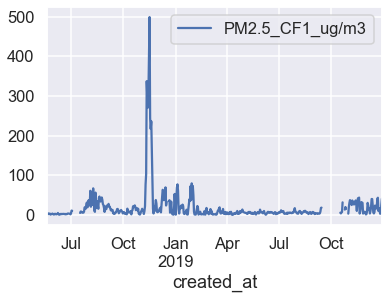

In [100]:
(pa.resample('D')
 .mean()
 .plot(None, 'PM2.5_CF1_ug/m3')
)

<AxesSubplot:xlabel='date'>

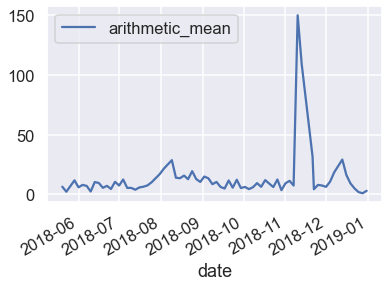

In [99]:
(aqs
 .plot(None, 'arithmetic_mean')
)

In [105]:
pa

,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,...,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 10
created_at,,,,,,,,,
2018-05-20 00:00:35+00:00,20733,0.98,1.23,1.23,...,83.0,32.0,1.23,NaN
2018-05-20 00:01:55+00:00,20734,0.96,1.94,1.94,...,83.0,32.0,1.94,NaN
2018-05-20 00:03:15+00:00,20735,1.07,1.80,2.14,...,83.0,32.0,1.80,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-29 23:55:30+00:00,523358,24.44,40.45,45.52,...,52.0,67.0,36.91,NaN
2019-12-29 23:57:30+00:00,523359,23.69,37.72,40.99,...,58.0,67.0,35.49,NaN
2019-12-29 23:59:30+00:00,523360,24.60,37.57,42.47,...,58.0,66.0,35.33,NaN


<AxesSubplot:>

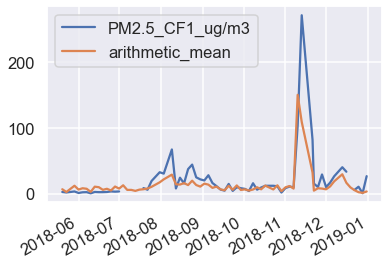

In [113]:
(pa
 .resample('D')
 [['PM2.5_CF1_ug/m3']]
 .mean()
 .tz_localize(None) # Remove timezone...not the greatest
.join(aqs[['arithmetic_mean']], how='inner')
.plot()
)

https://www.wikiwand.com/en/Camp_Fire_(2018)

The Camp Fire was the deadliest and most destructive wildfire in California's history,[11] and the most expensive natural disaster in the world in 2018 in terms of insured losses.[12][13][3]

Named after Camp Creek Road, its place of origin,[14] the fire started on Thursday, November 8, 2018, in Northern California's Butte County. Ignited by a faulty electric transmission line, the fire originated above several communities and an east wind drove the fire downhill through developed areas. After exhibiting extreme fire spread, fireline intensity, and spotting behaviors through the rural community of Concow, an urban firestorm formed in the foothill town of Paradise.[15][16][17][18] Drought was a factor: Paradise, which typically sees five inches of autumn rain by November 12, had only received one-seventh of an inch by that date in 2018. With the arrival of the first winter rainstorm of the season, the fire reached 100 percent containment after seventeen days on November 25.